In [1]:
#Build a Logistic Regression Model to find whether Student gets College Admission or not(YES/NO),
#based on results of two exams

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("ex2data1.txt")
data.head()

,Exam-1,Exam-2,Admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [14]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

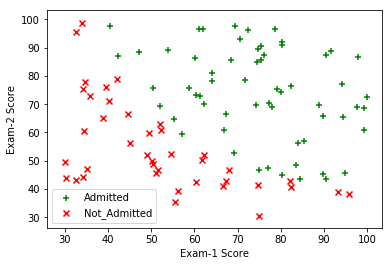

In [15]:
import matplotlib.pyplot as plt
plt.scatter(X[Y==1,0],X[Y==1,1],color='g',marker='+',label='Admitted')
plt.scatter(X[Y==0,0],X[Y==0,1],color='r',marker='x',label='Not_Admitted')
plt.legend()
plt.xlabel("Exam-1 Score")
plt.ylabel("Exam-2 Score")

plt.show()

In [16]:
m,n = X.shape[0],X.shape[1]
X = np.append(np.ones((m,1)),X,axis=1)

#### Hypothesis & Sigmoid Function

In [17]:
import math
#h(x) = g(theta'*x) Hypothesis for Logistic Regression
def Sigmoid(z):
    return 1/(1+np.exp(-z))

#### Cost Function

In [18]:
def sub(x,s=1):
    return np.subtract(s,x)

def fun_cost(theta,x,y):
    sig = Sigmoid(x.dot(theta))
    y = y.reshape(-1,1)
    y_trans = y.transpose()
    J = -(y_trans.dot(np.log(sig))+sub(y_trans).dot(np.log(sub(sig))))/m
    return J


#### Gradient Discent

In [19]:

def fun_gradient(theta,x,y):
    sig = Sigmoid(x.dot(theta))
    Grad = (X.transpose().dot(np.subtract(sig,y)))/m
    return Grad.flatten()


#### Optimizing Gradient

In [20]:
initial_theta = np.zeros((n+1,1))

import scipy.optimize as optimize
result = optimize.minimize(fun_cost,initial_theta,args=(X,Y),method='TNC',jac=fun_gradient);
theta = result.x
print("Cost after optimizing is : {:.3f}".format(result.fun[0]))
print("Final Theta values after optimizing : {}".format(theta))

Cost after optimizing is : 0.203
Final Theta values after optimizing : [-25.16131853   0.20623159   0.20147149]


#### Plotting Decision Boundary

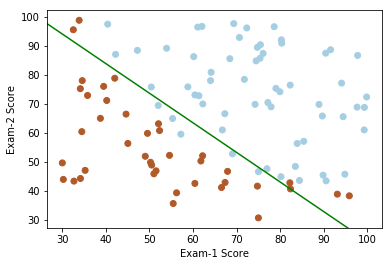

In [21]:
plt.scatter(X[:,1], X[:,2], c=Y,cmap='Paired_r')
ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = -(x_vals * theta[1] + theta[0])/theta[2]
plt.plot(x_vals, y_vals, c="green")
plt.xlabel("Exam-1 Score")
plt.ylabel("Exam-2 Score")
plt.show()

In [22]:
#The Equation of the Line 
#w[1] * y = w[0] * x + b 
# to solve for y
#y = (w[0] * x)/w[1] + b / w[1]